<a href="https://colab.research.google.com/github/Jungseunggi/Section4_week1/blob/main/Section4_week1_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.1 교차검증(Cross Validation)**


교차검증은 과적합 방지를 목적으로 사용하는 것으로 day3에 추가하는 것이 맞는 것으로 보이나 우선 오늘 같이 배운것으로 일단 묶어서 정리

###**1.1.1 교차검증을 사용하는 이유??**

* 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향
* 따라서 테스트 데이터에만 과적합이 되는 학습모델이 만들어짐, 결국 일반화가 잘 안됨
* 이 문제를 해결하려고 교차검증을 사용

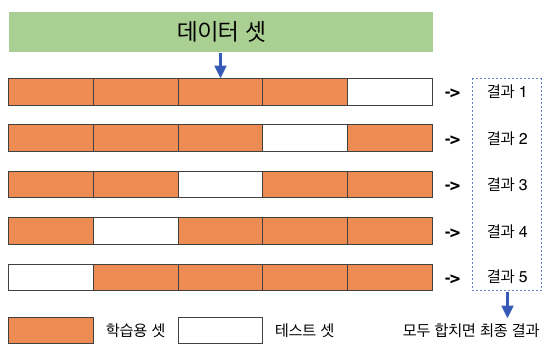

이미지 출처 : https://bbdata.tistory.com/10

* 생각해보면 test set에 과적합 되는 문제는 test set이 데이터 중 일부분으로 고정되어 있고, 이 일부분의 데이터 셋에 대하여 성능이 잘 나오도록 파라미터를 반복적으로 튜닝하기 때문에 발생
* 그리하여 교차검증은 test set을 하나로 고정하지 않고 위 이미지처럼 데이터셋을 k개로 나누고 중복없이 바꾸어가며 평가 
* k개의 평가 지표를 평균(평균이 아닌 방법을 사용할 수도 있음)내어서 최종적으로 모델의 성능을 평가

**교차 검증의 장점**

1) 모든 데이터 셋을 평가에 활용할 수 있음

* 과적합 방지 

* 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있음 

2) 모든 데이터 셋을 훈련에 활용할 수 있음

* 정확도를 향상시킬 수 있음

* 데이터 부족으로 인한 underfitting을 방지할 수 있음

**교차 검증의 단점**

* Iteration 횟수가 많기 때문에 모델 훈련/평가 시간이 오래 걸림

##**1.2 교차검증의 종류**

###**1.2.1 K-Fold Cross Validation**

* k-폴드 교차 검증은 위에 설명한 것 처럼 사용하면 됨




```
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20),
    Ridge(alpha=1.0)
)

# 3-fold 교차검증을 수행합니다. 
k = 3
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE ({k} folds):', -scores)


>>>MAE (3 folds): [19912.3716215  23214.74205495 18656.29713167]

# 최종 평균 스코어
-scores.mean()
>>> 20594.4702693718
```



###**1.2.2 Stratified K-Fold Cross Validation**

* 분류할 클래스의 비율이 다르다면 이를 반영해서 k개의 fold를 진행
* 아래 이미지를 보면 클래스의 비율에 맞춰서 쪼개지는 것을 볼 수 있음
 

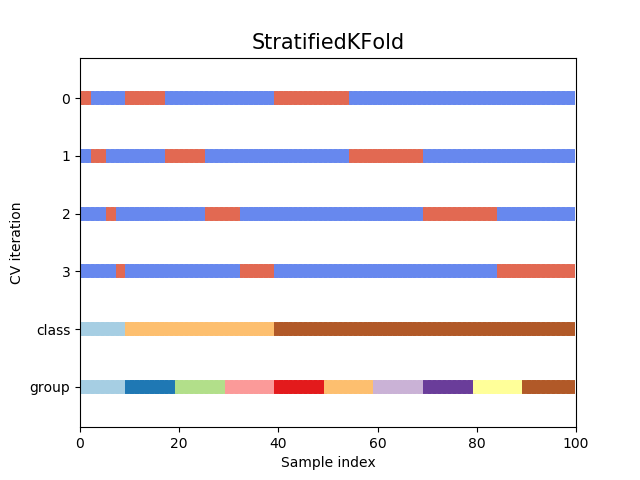

이미지 출처 : https://steadiness-193.tistory.com/287

###**1.2.3 K-Fold Cross Validation vs Stratified K-Fold Cross Validatio**

* 위와 같이 정리해본결과 **K-Fold는 회귀문제, Stratified K-Fold 분류문제**에 사용하는 것이 좋아 보임

# **1. 하이퍼파라미터 조정(Tuning)**

**파라미터(Parameter)**

* 파라미터는 모델 내부에서 결정되는 변수
* 사용자가 직접 설정하는 것이 아니라 모델링에 의해 자동으로 결정되는 값(예외인 경우 adam)도 있으니 후에 다시 공부

**하이퍼파라미터**

* 하이퍼 파라미터는 모델링할 때 사용자가 직접 세팅해주는 값

**튜닝하는 이유??**

* 예를 들어 수학,영어를 공부할 때 공부방법(머신러닝/딥러닝 모델링)은 다름 여기서 수능이라던지 내신이라던지 공부를 할땐 출제 빈도수, 유형 등 세부적인 학습(하이퍼파라미터)을 요구함
* 따라서 이런 세부적인 학습을 우리가 정해서 최적의 학습방법을 찾는 것

##**1.1 하이퍼 파라미터 튜닝 종류**

###**1.1.1 Grid search**

* 검증하고 싶은 하이퍼파라미터들의 수치를 정해주고 그 조합을 모두 검증
* Grid search (격자 탐색) 은 모델 하이퍼 파라미터에 넣을 수 있는 값을 순차적으로 입력한뒤에 가장 높은 성능을 보이는 하이퍼 파라미터들을 찾는 탐색 방법


**예시 코드**

함수의 파라미터로, 옵티마이저(optimizer)를 받음
```
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
```


위의 모델 만드는 함수로 KerasClassifier 를 만듬

```
classifier = KerasClassifier(build_fn = build_classifier)
```

조합할 파라미터를 딕셔너리로 셋팅

에포크 수, 배치 사이즈, 옵티마이저 등이 해당

```
parameters = {'batch_size': [25, 32],
              'epochs': [80, 100],
              'optimizer': ['adam', 'rmsprop']}
```
그리드 서치 함수를 만듬  

위의 변수들을 넣어주고, 크로스 밸리데이션 (Cross Validation) 갯수도 넣어줌


```
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
```


마지막으로 학습

```
grid_search = grid_search.fit(X_train, y_train)
```

결과 확인

```
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
```







###**1.1.2 RandomSearch**

* 검색 공간을 하이퍼파라미터 값의 경계 도메인으로 정의하고 해당 도메인에서 무작위로 샘플 포인트를 샘플링

참고용 : https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/